In [6]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# Solving the diffusion equation with FTCS method

Program is adapted from Garcia, chapter 6.

In [8]:
def solve_ftcs(tau,N,L,kappa,tMax):
    '''Use FTCS method to solve propegate diffusion equation'''
    
    h=L/(N-1)
    coeff=kappa*tau/h**2
    
    # Tell the user we are outside of the expected convergence parameter space
    if coeff > 0.5: print('WARNING: Solution expected to be unstable. Choose larger h or smaller tau')
 
    # Set initial conditions; we will enforce boundary conditions that Temp[0]=Temp[N-1]=0.
    Temp=np.zeros((tMax,N))
    Temp[0,int(N/2)]=1./h # "delta" function at the center

    for i in range(tMax-1): 
        Temp[i+1,1:N-1] = Temp[i,1:N-1]+coeff*(Temp[i,2:N]+Temp[i,0:N-2]-2.*Temp[i,1:N-1])
        
    return Temp


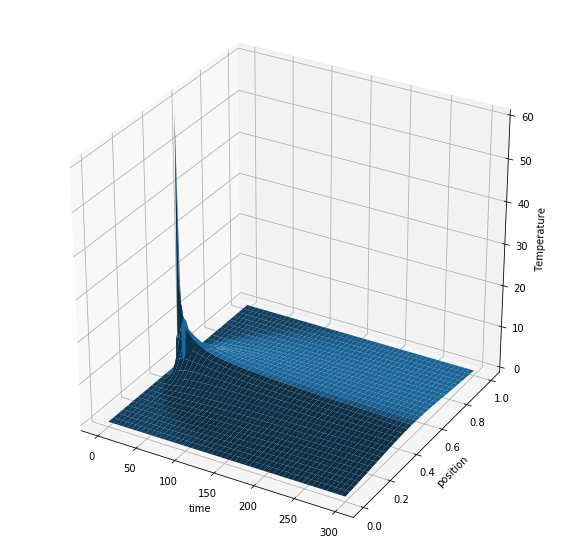

In [12]:
# Inputs for the diffusion equation
tau=1.e-4
N=61
L=1
kappa=1.0
tMax=300

# Make the spatial and time grids
x=np.linspace(0,L,N)
t=np.linspace(0,tMax,tMax)
Xp,Tp=np.meshgrid(x,t)

# Solve for the temperature distribution
Temp=solve_ftcs(tau,N,L,kappa,tMax)

# Make a 3D plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(Tp,Xp,Temp)

ax1.set_xlabel('time')
ax1.set_ylabel('position')
ax1.set_zlabel('Temperature')

plt.savefig('FTCS_diff.pdf',bbox_inches='tight')
plt.show()

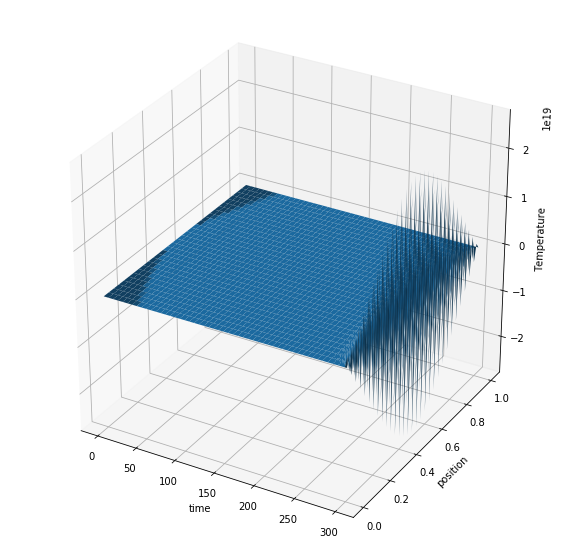

In [11]:
# Inputs for the diffusion equation: Here out timestep is too large, so it is not numerically stable
tau=1.5e-4
N=61
L=1
kappa=1.0
tMax=300

# Make the spatial and time grids
x=np.linspace(0,L,N)
t=np.linspace(0,tMax,tMax)
Xp,Tp=np.meshgrid(x,t)

# Solve for the temperature distribution
Temp=solve_ftcs(tau,N,L,kappa,tMax)

# Make a 3D plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(projection='3d')
ax1.plot_surface(Tp,Xp,Temp)

ax1.set_xlabel('time')
ax1.set_ylabel('position')
ax1.set_zlabel('Temperature')

plt.savefig('FTCS_diff_div.pdf',bbox_inches='tight')
plt.show()